# [빅데이터 처리1,2] - SPARK (5월 6일&7일)

# - spark vs 일반환경 소수 만드는 함수로 시간 비교해보기 

In [1]:
import numpy as np

In [2]:
import time

In [3]:
#스파크 접속 
sc = SparkContext.getOrCreate()

In [4]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [5]:
MAX = 100000

In [6]:
rdd = sc.parallelize([i for i in range(3,MAX+1)],10)

In [7]:
def get_prime(num):
    isPrime = True
    
    for index in range(2,num):
    
        if num % index == 0:
            isPrime = False
            break
    
    if isPrime == True:
        return num

In [8]:
start = time.time()

prime_list = rdd.map(get_prime).collect()

end = time.time()

In [9]:
print("소요시간=",end-start)

소요시간= 14.572202444076538


In [10]:
#spark 안쓸때 ??? -> 시간 더 걸림 

In [11]:
import numpy as np

In [12]:
import time

In [13]:
MAX =100000

In [14]:
lst01 = [i for i in range(3,MAX+1)]

In [15]:
def get_prime(num):
    isPrime = True
    
    for index in range(2,num):
        
        if num % index == 0:
            isPrime = False
            break 
   
    if isPrime == True:
        return num 

In [16]:
def get_prime(num):
    isPrime = True
    
    for index in range(2,num):
        
        if num % index == 0:
            isPrime = False
            break 
   
        else :
            isPrime == True
            
        return num 

In [17]:
print(get_prime(21))

21


In [18]:
start = time.time()

prime_list = list(map(get_prime, lst01))

end =time.time()

print("소요시간 =", end - start)

소요시간 = 0.05034828186035156


## - spark 이용한 Decision tree 

In [19]:
!pip install dtreeviz[pyspark]

In [20]:
from pyspark.mllib.tree import DecisionTree

In [21]:
#1) csv파일 불러오기 

In [22]:
spark.read.csv("playtennis.csv", header = True)

DataFrame[Outlook: string, Temperature: string, Humidity: string, Wind: string, PlayTennis: string]

In [23]:
df = spark.read.csv("playtennis.csv", header = True)

In [24]:
type(df)

pyspark.sql.dataframe.DataFrame

In [25]:
df["Outlook"].replace("Rain",2,inplace=True)
df.Outlook

TypeError: 'Column' object is not callable

In [27]:
df.show()            #아까도 얘기했지만 글씨 있으면 안되잖아.숫자로 바꾸라구

+--------+-----------+--------+------+----------+
| Outlook|Temperature|Humidity|  Wind|PlayTennis|
+--------+-----------+--------+------+----------+
|   Sunny|        Hot|    High|  Weak|        No|
|   Sunny|        Hot|    High|Strong|        No|
|Overcast|        Hot|    High|  Weak|       Yes|
|    Rain|       Mild|    High|  Weak|       Yes|
|    Rain|       Cool|  Normal|  Weak|       Yes|
|    Rain|       Cool|  Normal|Strong|        No|
|Overcast|       Cool|  Normal|Strong|       Yes|
|   Sunny|       Mild|    High|  Weak|        No|
|   Sunny|       Cool|  Normal|  Weak|       Yes|
|    Rain|       Mild|  Normal|  Weak|       Yes|
|   Sunny|       Mild|  Normal|Strong|       Yes|
|Overcast|       Mild|    High|Strong|       Yes|
|Overcast|        Hot|  Normal|  Weak|       Yes|
|    Rain|       Mild|    High|Strong|        No|
+--------+-----------+--------+------+----------+



In [28]:
#2) dataframe의 각 블록을 돌아 다니면서 컬럼값 수정

In [29]:
from pyspark.sql import functions as F

In [30]:

df = df.withColumn("Outlook",F.when(F.col("Outlook")=="Sunny",0).otherwise(F.col("Outlook")))


In [31]:
df.show()

+--------+-----------+--------+------+----------+
| Outlook|Temperature|Humidity|  Wind|PlayTennis|
+--------+-----------+--------+------+----------+
|       0|        Hot|    High|  Weak|        No|
|       0|        Hot|    High|Strong|        No|
|Overcast|        Hot|    High|  Weak|       Yes|
|    Rain|       Mild|    High|  Weak|       Yes|
|    Rain|       Cool|  Normal|  Weak|       Yes|
|    Rain|       Cool|  Normal|Strong|        No|
|Overcast|       Cool|  Normal|Strong|       Yes|
|       0|       Mild|    High|  Weak|        No|
|       0|       Cool|  Normal|  Weak|       Yes|
|    Rain|       Mild|  Normal|  Weak|       Yes|
|       0|       Mild|  Normal|Strong|       Yes|
|Overcast|       Mild|    High|Strong|       Yes|
|Overcast|        Hot|  Normal|  Weak|       Yes|
|    Rain|       Mild|    High|Strong|        No|
+--------+-----------+--------+------+----------+



In [32]:
df = df.withColumn("Outlook",F.when(F.col("Outlook")=="Overcast",1).otherwise(F.col("Outlook")))

In [33]:
df.show()

+-------+-----------+--------+------+----------+
|Outlook|Temperature|Humidity|  Wind|PlayTennis|
+-------+-----------+--------+------+----------+
|      0|        Hot|    High|  Weak|        No|
|      0|        Hot|    High|Strong|        No|
|      1|        Hot|    High|  Weak|       Yes|
|   Rain|       Mild|    High|  Weak|       Yes|
|   Rain|       Cool|  Normal|  Weak|       Yes|
|   Rain|       Cool|  Normal|Strong|        No|
|      1|       Cool|  Normal|Strong|       Yes|
|      0|       Mild|    High|  Weak|        No|
|      0|       Cool|  Normal|  Weak|       Yes|
|   Rain|       Mild|  Normal|  Weak|       Yes|
|      0|       Mild|  Normal|Strong|       Yes|
|      1|       Mild|    High|Strong|       Yes|
|      1|        Hot|  Normal|  Weak|       Yes|
|   Rain|       Mild|    High|Strong|        No|
+-------+-----------+--------+------+----------+



In [34]:
df = df.withColumn("Outlook",F.when(F.col("Outlook")=="Rain",2).otherwise(F.col("Outlook")))

In [35]:
df.show()

+-------+-----------+--------+------+----------+
|Outlook|Temperature|Humidity|  Wind|PlayTennis|
+-------+-----------+--------+------+----------+
|      0|        Hot|    High|  Weak|        No|
|      0|        Hot|    High|Strong|        No|
|      1|        Hot|    High|  Weak|       Yes|
|      2|       Mild|    High|  Weak|       Yes|
|      2|       Cool|  Normal|  Weak|       Yes|
|      2|       Cool|  Normal|Strong|        No|
|      1|       Cool|  Normal|Strong|       Yes|
|      0|       Mild|    High|  Weak|        No|
|      0|       Cool|  Normal|  Weak|       Yes|
|      2|       Mild|  Normal|  Weak|       Yes|
|      0|       Mild|  Normal|Strong|       Yes|
|      1|       Mild|    High|Strong|       Yes|
|      1|        Hot|  Normal|  Weak|       Yes|
|      2|       Mild|    High|Strong|        No|
+-------+-----------+--------+------+----------+



In [36]:
df = df.withColumn("Temperature",F.when(F.col("Temperature")=="Hot",0).otherwise(F.col("Temperature")))
df = df.withColumn("Temperature",F.when(F.col("Temperature")=="Mild",1).otherwise(F.col("Temperature")))
df = df.withColumn("Temperature",F.when(F.col("Temperature")=="Cool",2).otherwise(F.col("Temperature")))

df = df.withColumn("Humidity", F.when(F.col("Humidity")=="High", 0).otherwise(F.col("Humidity")))
df = df.withColumn("Humidity", F.when(F.col("Humidity")=="Normal", 1).otherwise(F.col("Humidity")))

df = df.withColumn("Wind", F.when( F.col("Wind")=="Weak",0).otherwise(F.col("Wind")))
df = df.withColumn("Wind", F.when( F.col("Wind")=="Strong",1).otherwise(F.col("Wind")))

df = df.withColumn("PlayTennis", F.when( F.col("PlayTennis")=="No",0).otherwise(F.col("PlayTennis")))
df = df.withColumn("PlayTennis", F.when( F.col("PlayTennis")=="Yes",1).otherwise(F.col("PlayTennis")))

In [37]:
df.show()

+-------+-----------+--------+----+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|
+-------+-----------+--------+----+----------+
|      0|          0|       0|   0|         0|
|      0|          0|       0|   1|         0|
|      1|          0|       0|   0|         1|
|      2|          1|       0|   0|         1|
|      2|          2|       1|   0|         1|
|      2|          2|       1|   1|         0|
|      1|          2|       1|   1|         1|
|      0|          1|       0|   0|         0|
|      0|          2|       1|   0|         1|
|      2|          1|       1|   0|         1|
|      0|          1|       1|   1|         1|
|      1|          1|       0|   1|         1|
|      1|          0|       1|   0|         1|
|      2|          1|       0|   1|         0|
+-------+-----------+--------+----+----------+



In [38]:
#3) 컬럼 타입 수정 

In [39]:
df.schema

StructType(List(StructField(Outlook,StringType,true),StructField(Temperature,StringType,true),StructField(Humidity,StringType,true),StructField(Wind,StringType,true),StructField(PlayTennis,StringType,true)))

In [40]:
df = df.withColumn("Outlook", df['Outlook'].cast('int'))

In [41]:
df.schema

StructType(List(StructField(Outlook,IntegerType,true),StructField(Temperature,StringType,true),StructField(Humidity,StringType,true),StructField(Wind,StringType,true),StructField(PlayTennis,StringType,true)))

In [42]:
df = df.withColumn("Temperature",df['Temperature'].cast('int'))
df = df.withColumn("Humidity",df['Humidity'].cast('int'))
df = df.withColumn("Wind",df['Wind'].cast('int'))
df = df.withColumn("PlayTennis",df['PlayTennis'].cast('int'))

In [43]:
df.schema

StructType(List(StructField(Outlook,IntegerType,true),StructField(Temperature,IntegerType,true),StructField(Humidity,IntegerType,true),StructField(Wind,IntegerType,true),StructField(PlayTennis,IntegerType,true)))

## spark 를 이용한 Decision Tree 

In [44]:
#4) Decision Tree 
# 독립변수 칸이 서로 다른 블록에 있을 수 있는데 같은 블록에 있어야함 => 한칸에 독립변수 다 때려 넣기 
# : vector Assemble 138~139

#train-test 분리 

# decision tree 만들고 예측 

In [45]:
df.show()

+-------+-----------+--------+----+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|
+-------+-----------+--------+----+----------+
|      0|          0|       0|   0|         0|
|      0|          0|       0|   1|         0|
|      1|          0|       0|   0|         1|
|      2|          1|       0|   0|         1|
|      2|          2|       1|   0|         1|
|      2|          2|       1|   1|         0|
|      1|          2|       1|   1|         1|
|      0|          1|       0|   0|         0|
|      0|          2|       1|   0|         1|
|      2|          1|       1|   0|         1|
|      0|          1|       1|   1|         1|
|      1|          1|       0|   1|         1|
|      1|          0|       1|   0|         1|
|      2|          1|       0|   1|         0|
+-------+-----------+--------+----+----------+



In [46]:
from pyspark.ml.feature import VectorAssembler

In [50]:

assembler = VectorAssembler(inputCols=["Outlook","Temperature","Humidity","Wind"], outputCol="features")


In [48]:
assembler_df = assembler.transform(df)

In [49]:
assembler_df.show()

+-------+-----------+--------+----+----------+-----------------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|
+-------+-----------+--------+----+----------+-----------------+
|      0|          0|       0|   0|         0|        (4,[],[])|
|      0|          0|       0|   1|         0|    (4,[3],[1.0])|
|      1|          0|       0|   0|         1|    (4,[0],[1.0])|
|      2|          1|       0|   0|         1|[2.0,1.0,0.0,0.0]|
|      2|          2|       1|   0|         1|[2.0,2.0,1.0,0.0]|
|      2|          2|       1|   1|         0|[2.0,2.0,1.0,1.0]|
|      1|          2|       1|   1|         1|[1.0,2.0,1.0,1.0]|
|      0|          1|       0|   0|         0|    (4,[1],[1.0])|
|      0|          2|       1|   0|         1|[0.0,2.0,1.0,0.0]|
|      2|          1|       1|   0|         1|[2.0,1.0,1.0,0.0]|
|      0|          1|       1|   1|         1|[0.0,1.0,1.0,1.0]|
|      1|          1|       0|   1|         1|[1.0,1.0,0.0,1.0]|
|      1|          0|    

In [ ]:
# train&test 데이터 나누기 

In [51]:
(trainingData, testData) = assembler_df.randomSplit([0.7,0.3])

In [52]:
trainingData.show()

+-------+-----------+--------+----+----------+-----------------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|
+-------+-----------+--------+----+----------+-----------------+
|      0|          0|       0|   1|         0|    (4,[3],[1.0])|
|      0|          1|       0|   0|         0|    (4,[1],[1.0])|
|      0|          1|       1|   1|         1|[0.0,1.0,1.0,1.0]|
|      0|          2|       1|   0|         1|[0.0,2.0,1.0,0.0]|
|      1|          0|       0|   0|         1|    (4,[0],[1.0])|
|      1|          0|       1|   0|         1|[1.0,0.0,1.0,0.0]|
|      2|          1|       0|   1|         0|[2.0,1.0,0.0,1.0]|
|      2|          2|       1|   0|         1|[2.0,2.0,1.0,0.0]|
|      2|          2|       1|   1|         0|[2.0,2.0,1.0,1.0]|
+-------+-----------+--------+----+----------+-----------------+



In [53]:
testData.show()

+-------+-----------+--------+----+----------+-----------------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|
+-------+-----------+--------+----+----------+-----------------+
|      0|          0|       0|   0|         0|        (4,[],[])|
|      1|          1|       0|   1|         1|[1.0,1.0,0.0,1.0]|
|      1|          2|       1|   1|         1|[1.0,2.0,1.0,1.0]|
|      2|          1|       0|   0|         1|[2.0,1.0,0.0,0.0]|
|      2|          1|       1|   0|         1|[2.0,1.0,1.0,0.0]|
+-------+-----------+--------+----+----------+-----------------+



In [54]:
# 트리 만들어서 (분류 )및 예측 

In [55]:
from pyspark.ml.classification import DecisionTreeClassifier

In [56]:

dt = DecisionTreeClassifier(featuresCol="features",labelCol = "PlayTennis")


In [57]:
dtModel = dt.fit(trainingData)

In [58]:
dtModel

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_82c5c28f172e) of depth 3 with 11 nodes

In [59]:
prediction = dtModel.transform(testData)

In [60]:
prediction.show()

+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|rawPrediction|probability|prediction|
+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+
|      0|          0|       0|   0|         0|        (4,[],[])|    [2.0,0.0]|  [1.0,0.0]|       0.0|
|      1|          1|       0|   1|         1|[1.0,1.0,0.0,1.0]|    [0.0,1.0]|  [0.0,1.0]|       1.0|
|      1|          2|       1|   1|         1|[1.0,2.0,1.0,1.0]|    [0.0,3.0]|  [0.0,1.0]|       1.0|
|      2|          1|       0|   0|         1|[2.0,1.0,0.0,0.0]|    [1.0,0.0]|  [1.0,0.0]|       0.0|
|      2|          1|       1|   0|         1|[2.0,1.0,1.0,0.0]|    [0.0,1.0]|  [0.0,1.0]|       1.0|
+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+



In [61]:
right_predict = prediction.filter(prediction.PlayTennis == prediction.prediction)

In [62]:
right_predict.show()

+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|rawPrediction|probability|prediction|
+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+
|      0|          0|       0|   0|         0|        (4,[],[])|    [2.0,0.0]|  [1.0,0.0]|       0.0|
|      1|          1|       0|   1|         1|[1.0,1.0,0.0,1.0]|    [0.0,1.0]|  [0.0,1.0]|       1.0|
|      1|          2|       1|   1|         1|[1.0,2.0,1.0,1.0]|    [0.0,3.0]|  [0.0,1.0]|       1.0|
|      2|          1|       1|   0|         1|[2.0,1.0,1.0,0.0]|    [0.0,1.0]|  [0.0,1.0]|       1.0|
+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+



In [ ]:
# 정확도 계산 

In [63]:
right_predict.count()

4

In [64]:
prediction.count()

5

In [65]:
right_predict.count() / prediction.count()

0.8

## 시각화

In [67]:
from dtreeviz import trees
from dtreeviz.models.spark_decision_tree import ShadowSparkTree

In [ ]:
#독립변수, 종속변수 조회 

In [68]:
trainingData["Outlook","Temperature","Humidity","Wind"].show()

+-------+-----------+--------+----+
|Outlook|Temperature|Humidity|Wind|
+-------+-----------+--------+----+
|      0|          0|       0|   1|
|      0|          1|       0|   0|
|      0|          1|       1|   1|
|      0|          2|       1|   0|
|      1|          0|       0|   0|
|      1|          0|       1|   0|
|      2|          1|       0|   1|
|      2|          2|       1|   0|
|      2|          2|       1|   1|
+-------+-----------+--------+----+



In [72]:
trainingData[["PlayTennis"]].show()

+----------+
|PlayTennis|
+----------+
|         0|
|         0|
|         1|
|         1|
|         1|
|         1|
|         0|
|         1|
|         0|
+----------+



In [97]:
trainingData["PlayTennis"].show()

TypeError: 'Column' object is not callable

In [ ]:
#Decision Tree의 내용 조회 

In [74]:
print(dtModel.toDebugString)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_82c5c28f172e) of depth 3 with 11 nodes
  If (feature 2 <= 0.5)
   If (feature 0 <= 0.5)
    Predict: 0.0
   Else (feature 0 > 0.5)
    If (feature 0 <= 1.5)
     Predict: 1.0
    Else (feature 0 > 1.5)
     Predict: 0.0
  Else (feature 2 > 0.5)
   If (feature 0 <= 1.5)
    Predict: 1.0
   Else (feature 0 > 1.5)
    If (feature 3 <= 0.5)
     Predict: 1.0
    Else (feature 3 > 0.5)
     Predict: 0.0



In [ ]:
# 학습데이터 data frame 

In [73]:
trainingData.show()

+-------+-----------+--------+----+----------+-----------------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|
+-------+-----------+--------+----+----------+-----------------+
|      0|          0|       0|   1|         0|    (4,[3],[1.0])|
|      0|          1|       0|   0|         0|    (4,[1],[1.0])|
|      0|          1|       1|   1|         1|[0.0,1.0,1.0,1.0]|
|      0|          2|       1|   0|         1|[0.0,2.0,1.0,0.0]|
|      1|          0|       0|   0|         1|    (4,[0],[1.0])|
|      1|          0|       1|   0|         1|[1.0,0.0,1.0,0.0]|
|      2|          1|       0|   1|         0|[2.0,1.0,0.0,1.0]|
|      2|          2|       1|   0|         1|[2.0,2.0,1.0,0.0]|
|      2|          2|       1|   1|         0|[2.0,2.0,1.0,1.0]|
+-------+-----------+--------+----+----------+-----------------+



In [75]:
dataset = trainingData.toPandas()
dataset

,Outlook,Temperature,Humidity,Wind,PlayTennis,features
0,0,0,0,1,0,"(0.0, 0.0, 0.0, 1.0)"
1,0,1,0,0,0,"(0.0, 1.0, 0.0, 0.0)"
2,0,1,1,1,1,"[0.0, 1.0, 1.0, 1.0]"
3,0,2,1,0,1,"[0.0, 2.0, 1.0, 0.0]"
4,1,0,0,0,1,"(1.0, 0.0, 0.0, 0.0)"
5,1,0,1,0,1,"[1.0, 0.0, 1.0, 0.0]"
6,2,1,0,1,0,"[2.0, 1.0, 0.0, 1.0]"
7,2,2,1,0,1,"[2.0, 2.0, 1.0, 0.0]"
8,2,2,1,1,0,"[2.0, 2.0, 1.0, 1.0]"


In [80]:
dataset = dataset[["Outlook","Temperature","Humidity","Wind","PlayTennis"]]
dataset

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,0,0,1,0
1,0,1,0,0,0
2,0,1,1,1,1
3,0,2,1,0,1
4,1,0,0,0,1
5,1,0,1,0,1
6,2,1,0,1,0
7,2,2,1,0,1
8,2,2,1,1,0


In [ ]:
#Decision Tree의 출력 정보 설정 

In [89]:
spark_dtree = ShadowSparkTree(
    dtModel,
    dataset[["Outlook","Temperature","Humidity","Wind"]],
    dataset["PlayTennis"],
    feature_names = ["Outlook","Temperature","Humidity","Wind"],
    target_name="PlayTennis",
    class_names=["No","Yes"]
)

In [90]:
spark_dtree

In [91]:
#path 설정

In [92]:
import os 
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin'

In [93]:
os.environ["PATH"]

'C:\\Users\\Admin\\anaconda3\\envs\\spark_env;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Library\\mingw-w64\\bin;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Library\\usr\\bin;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Library\\bin;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Scripts;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\bin;C:\\Users\\Admin\\anaconda3\\condabin;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\iCLS;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\iCLS;C:\\Windows\\system32;C:\\Program Files\\Graphviz\\bin;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0;C:\\Windows\\System32\\OpenSSH;C:\\Program Files\\Intel\\WiFi\\bin;C:\\Program Files\\Common Files\\Intel\\WirelessCommon;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\DAL;C:\

In [94]:
#시각화

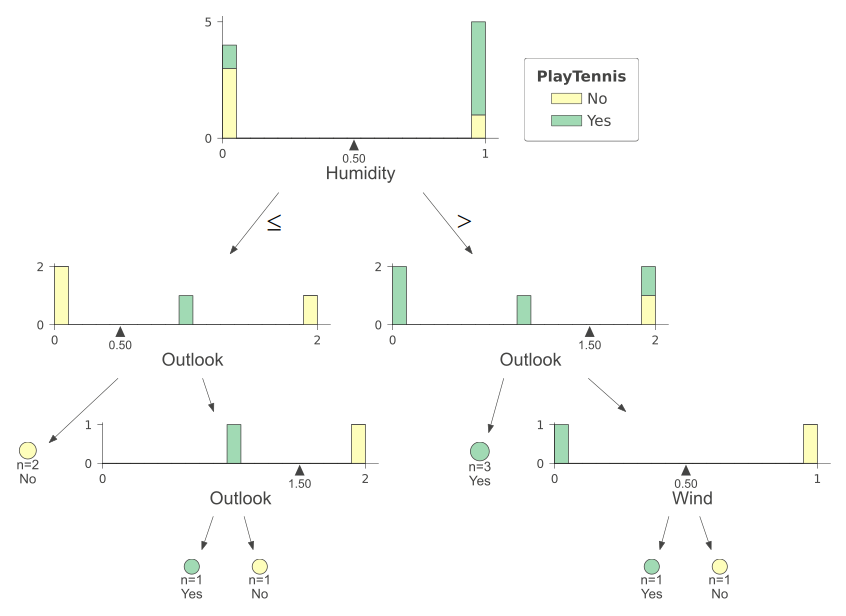

In [95]:
trees.dtreeviz(spark_dtree,scale=2.0)